<a href="https://colab.research.google.com/github/kdstheace/Study_Python_MachineLearning/blob/main/%5BReview%5DKeras_FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, Dropout, MaxPool2D, Conv2D, Flatten
from keras.utils import to_categorical
from keras.optimizers import Adam

from keras.datasets import fashion_mnist
 

In [8]:
width = 28
height = 28

In [35]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [33]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
y_test[0]

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


9

In [16]:
labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle-boot']

TypeError: ignored

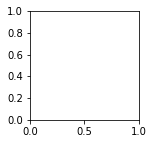

In [43]:
plt.rcParams['figure.figsize'] = (2,2)
plt.imshow(x_train[0], cmap='gray')
print(labels[y_train[0]])
plt.title(labels[y_train[0]])
plt.show()

In [36]:
x_train = x_train.reshape(60000, width, height, 1).astype('float64')/255
x_test = x_test.reshape(10000, width, height, 1).astype('float64')/255

y_test = to_categorical(y_test)
y_train = to_categorical(y_train)
print(np.argmax(y_test[0]))
print(np.argmax(y_train[0]))

9
9


In [40]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape=(width, height, 1)))
model.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 32)        9248      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 32)          9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 512)              

In [41]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [42]:
hist = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/30
1875/1875 [==============================] - 37s 4ms/step - loss: 0.6596 - accuracy: 0.7545 - val_loss: 0.3534 - val_accuracy: 0.8680
Epoch 2/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3067 - accuracy: 0.8868 - val_loss: 0.2801 - val_accuracy: 0.8955
Epoch 3/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2552 - accuracy: 0.9067 - val_loss: 0.2822 - val_accuracy: 0.8989
Epoch 4/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2178 - accuracy: 0.9196 - val_loss: 0.2526 - val_accuracy: 0.9045
Epoch 5/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1924 - accuracy: 0.9291 - val_loss: 0.2421 - val_accuracy: 0.9113
Epoch 6/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1733 - accuracy: 0.9358 - val_loss: 0.2538 - val_accuracy: 0.9125
Epoch 7/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1546 - accuracy: 0.9430 - val_loss: 0.2586 - val_accuracy

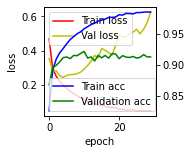

In [44]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'r', label='Train loss')
loss_ax.plot(hist.history['val_loss'], 'y', label='Val loss')
acc_ax.plot(hist.history['accuracy'], 'b', label='Train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='Validation acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_xlabel('acc')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [45]:
yhat = model.predict(x_test)

In [65]:
i =12
print(np.argmax(yhat[i]))
print(np.argmax(y_test[i]))

8
7


12
17
23
25
27
29
33
40
42
49
67
68
89
98
107
141
147
150
153
155
172
244
266
283
312


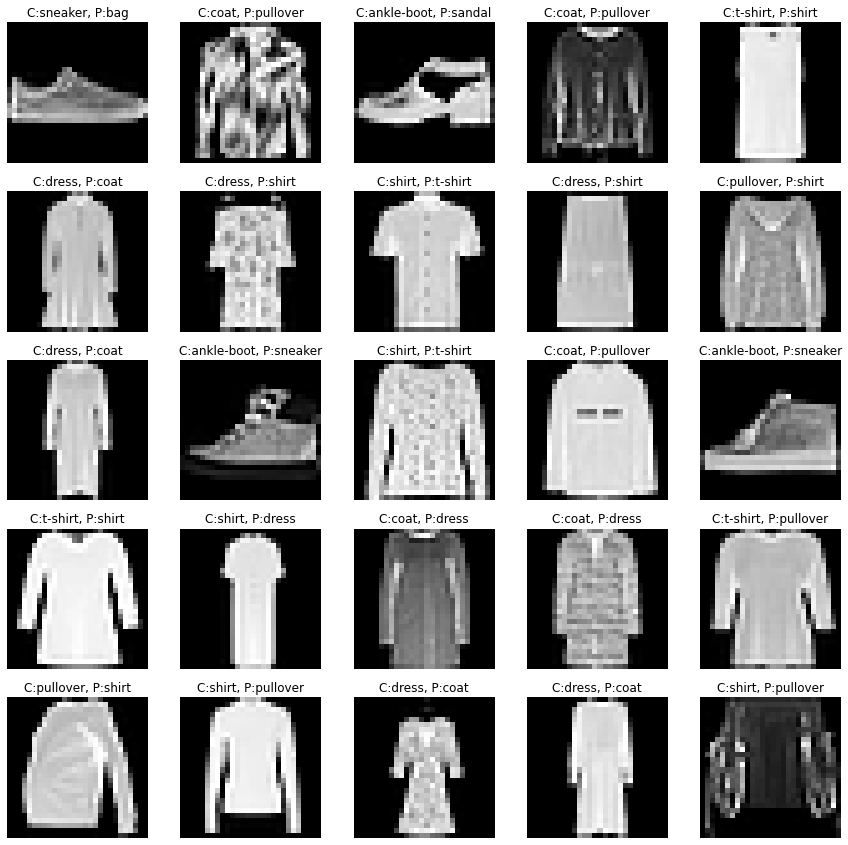

In [66]:
plt.rcParams['figure.figsize']=(15, 15)
row = 5
col = 5

f, ax = plt.subplots(row, col)
cnt = 0
i = 0

while cnt < (row*col):
  if np.argmax(y_test[i]) == np.argmax(yhat[i]):
    i += 1
    continue
  
  print(i)
  sub_plot = ax[int(cnt/row), int(cnt%col)]
  sub_plot.axis('off')
  sub_plot.imshow(x_test[i].reshape(width, height), cmap='gray')
  title = 'C:' + labels[np.argmax(y_test[i])] + ', P:' + labels[np.argmax(yhat[i])]
  sub_plot.set_title(title)

  i+=1
  cnt+=1
